In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

%matplotlib inline

In [2]:
data_dir = "./data/"

In [3]:
df = pd.read_csv(os.path.join(data_dir, "evals.csv"))

In [4]:
eleven_grad=["darkred", "brown", "darkorange", "orange", "gold", "dodgerblue", "royalblue", "blue", "green", "forestgreen", "limegreen"]
seven_grad=["darkred", "orange", "gold", "dodgerblue", "royalblue", "green", "forestgreen"]
seven_diff=["darkred", "green", "dodgerblue", "gold", "royalblue", "orange", "forestgreen"]

In [5]:
df.head()

,eval_id,learner_id,audience,group,level,role,organization,pronouns,sexuality,ethnicity,...,digital_content,digital_smooth,digital_professional,digital_accessible,personnel_present,personnel_pleasant,personnel_helpful,personnel_professional,personnel_inclusive,personnel_knowledgeable
0,70000,0,Employee,PM,4,HumanResources,CRA,SheHer,Bisexual,Caucasian,...,True,False,False,False,False,False,False,False,False,False
1,70000,0,Employee,PM,4,HumanResources,CRA,SheHer,Bisexual,Caucasian,...,True,True,False,True,True,False,False,False,False,True
2,70001,1,Employee,FB,3,Legal,StatsCan,SheHer,Heterosexual,NoAnswer,...,True,False,False,True,False,False,False,False,False,False
3,70001,1,Employee,FB,3,Legal,StatsCan,SheHer,Heterosexual,NoAnswer,...,True,False,False,False,True,True,False,False,False,True
4,70002,2,Employee,EC,2,Regulatory,PSC,HeHim,Heterosexual,Caucasian,...,True,False,False,True,False,False,False,False,False,False


In [6]:
df.describe()

,eval_id,learner_id,level,openness,exclusion,registration_id,offering_id,module,current_skill,desired_skill,final_skill,rating,percent_completed
count,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000,15432.000000
mean,80618.420684,10618.420684,3.408113,0.597814,0.160627,99624.641524,960.199067,181.865474,2.518533,4.583917,2.999028,7.676905,0.796436
std,7906.514896,7906.514896,1.804876,0.149849,0.148087,73716.390247,94.998638,96.418462,1.463413,1.492107,1.576983,1.705622,0.158263
min,70000.000000,0.000000,1.000000,0.025088,0.000000,0.000000,877.000000,101.000000,0.000000,2.000000,0.000000,4.000000,0.200000
25%,73428.750000,3428.750000,2.000000,0.499684,0.000000,30428.750000,880.000000,101.000000,1.000000,4.000000,2.000000,6.000000,0.700000
50%,77357.500000,7357.500000,3.000000,0.596297,0.200000,70357.500000,884.000000,102.000000,2.000000,5.000000,3.000000,8.000000,0.800000
75%,89570.250000,19570.250000,5.000000,0.699957,0.200000,182141.250000,1077.000000,301.000000,4.000000,6.000000,4.000000,9.000000,0.900000
max,91999.000000,21999.000000,7.000000,1.000000,1.400000,192999.000000,1078.000000,301.000000,8.000000,10.000000,9.000000,10.000000,1.000000


In [7]:
audience = df.audience
role = df.role

In [8]:
scan = df.drop(['eval_id', 'learner_id', 'registration_id', 'offering_id'], axis=1)

In [9]:
scan.groupby(['audience', 'role', 'ethnicity']).agg('mean')

level  person_with_disability  \
audience   role           ethnicity                                          
Employee   Administrative Asian           3.318182                0.159091   
                          Black           3.275000                0.200000   
                          Caucasian       2.973607                0.090909   
                          HispanicLatinx  3.020408                0.122449   
                          Indigenous      3.122449                0.102041   
...                                            ...                     ...   
Specialist Security       Black           2.428571                0.000000   
                          Caucasian       2.850467                0.074766   
                          HispanicLatinx  3.333333                0.666667   
                          Indigenous      2.666667                0.222222   
                          NoAnswer        3.750000                0.000000   

                                          openness  exclusion      module  \
audience   role           ethnicity                                         
Employee   Administrative Asian           0.542268   0.138636  169.522727   
                          Black           0.528395   0.150000  206.250000   
                          Caucasian       0.598622   0.162170  185.170088   
                          HispanicLatinx  0.571002   0.173469  170.714286   
                          Indigenous      0.628241   0.167347  199.224490   
...                                            ...        ...         ...   
Specialist Security       Black           0.561939   0.128571  244.000000   
                          Caucasian       0.613187   0.151402  168.626168   
                          HispanicLatinx  0.539646   0.133333  168.000000   
                          Indigenous      0.558381   0.166667  190.222222   
                          NoAnswer        0.422797   0.200000  201.250000   

                                          current_skill  desired_skill  \
audience   role           ethnicity                                      
Employee   Administrative Asian                2.318182       4.500000   
                          Black                2.450000       4.525000   
                          Caucasian            2.643695       4.695015   
                          HispanicLatinx       2.102041       4.102041   
                          Indigenous           2.591837       4.673469   
...                                                 ...            ...   
Specialist Security       Black                3.571429       5.571429   
                          Caucasian            2.242991       4.336449   
                          HispanicLatinx       3.666667       5.666667   
                          Indigenous           2.222222       4.222222   
                          NoAnswer             3.750000       5.750000   

                                          final_skill  recommend    rating  \
audience   role           ethnicity                                          
Employee   Administrative Asian              2.772727   0.522727  7.136364   
                          Black              2.850000   0.550000  7.025000   
                          Caucasian          3.143695   0.715543  7.678886   
                          HispanicLatinx     2.551020   0.693878  7.326531   
                          Indigenous         3.142857   0.816327  7.979592   
...                                               ...        ...       ...   
Specialist Security       Black              3.714286   0.857143  7.428571   
                          Caucasian          2.794393   0.738318  7.757009   
                          HispanicLatinx     4.000000   0.666667  7.000000   
                          Indigenous         2.666667   0.666667  7.000000   
                          NoAnswer           4.000000   0.000000  5.750000   

                                          ...  dig

In [10]:
scan.groupby('module').agg('mean')

,level,person_with_disability,openness,exclusion,current_skill,desired_skill,final_skill,recommend,rating,clear,...,digital_content,digital_smooth,digital_professional,digital_accessible,personnel_present,personnel_pleasant,personnel_helpful,personnel_professional,personnel_inclusive,personnel_knowledgeable
module,,,,,,,,,,,,,,,,,,,,,
101,3.383333,0.098222,0.597243,0.162156,2.515333,4.584444,2.652222,0.662889,7.332444,0.356444,...,1.0,0.350667,0.491333,0.446222,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
102,3.383333,0.098222,0.597243,0.162156,2.515333,4.584444,3.624444,0.745111,7.760444,0.240444,...,1.0,0.226444,0.154000,0.245556,1.0,0.445333,0.502889,0.466889,0.293333,0.593778
201,3.810185,0.087963,0.615659,0.165741,2.412037,4.495370,2.449074,0.462963,6.500000,0.254630,...,0.0,0.000000,0.000000,0.000000,1.0,0.231481,0.240741,0.319444,0.268519,0.592593
202,3.810185,0.087963,0.615659,0.165741,2.412037,4.495370,3.402778,0.796296,8.050926,0.569444,...,0.0,0.000000,0.000000,0.000000,1.0,0.259259,0.212963,0.393519,0.240741,0.518519
301,3.416333,0.097333,0.597384,0.157967,2.531000,4.589500,2.795333,0.764500,7.901500,0.490333,...,1.0,0.267833,0.500000,0.371500,1.0,0.523167,0.588833,0.337333,0.541833,0.535833


In [11]:
feedback = scan.drop(["level", "current_skill", "desired_skill", "final_skill", "rating"], axis=1)

skill = scan[["module", "current_skill", "desired_skill", "final_skill"]]
learning_obj = scan[["module", "lo_1", "lo_2"]]

module = feedback[["module", "clear", "entertaining", "relevant", "informative", "useful", "inclusive"]]
digital = feedback[["module", "digital_smooth", "digital_professional", "digital_accessible"]]
physical = feedback[["module", "physical_clean", "physical_pleasant", "physical_accessible", "physical_professional", "physical_comfortable"]]
personnel = feedback[["module", "personnel_pleasant", "personnel_helpful", "personnel_professional", "personnel_inclusive", "personnel_knowledgeable"]]
rating = df[["module", "rating"]]

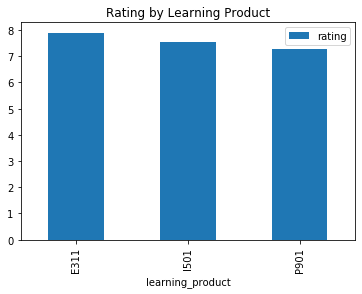

In [12]:
rating_offering = df[["learning_product", "rating"]]
rating_offering.groupby("learning_product").agg("mean").plot(kind="bar", title="Rating by Learning Product")

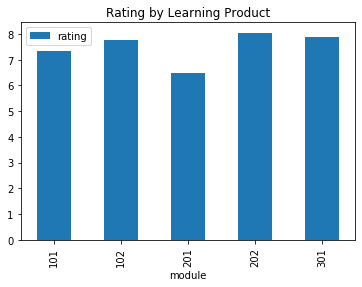

In [13]:
module_rating = df[["module", "rating"]]
module_rating.groupby("module").agg("mean").plot(kind="bar", title="Rating by Learning Product")

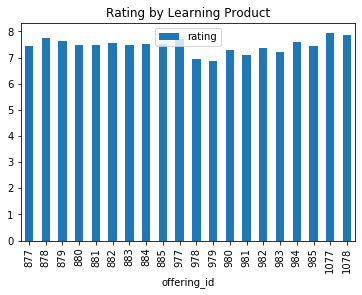

In [14]:
offering_rating = df[["offering_id", "rating"]]
offering_rating.groupby("offering_id").agg("mean").plot(kind="bar", title="Rating by Learning Product")

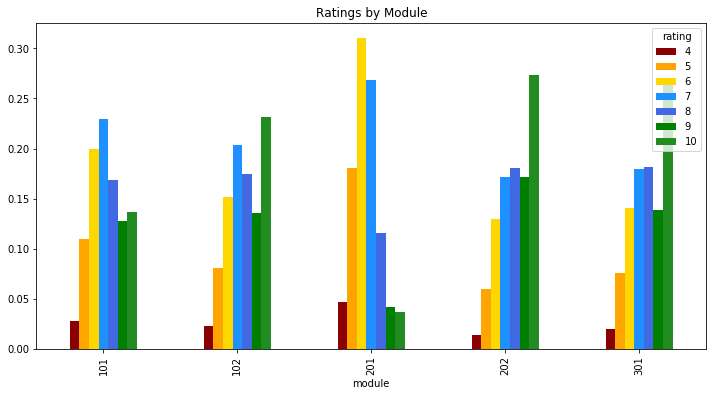

In [15]:
pd.crosstab(df.module, df.rating, normalize="index").plot(
    kind="bar", color=seven_grad, figsize=(12, 6),
    title="Ratings by Module")

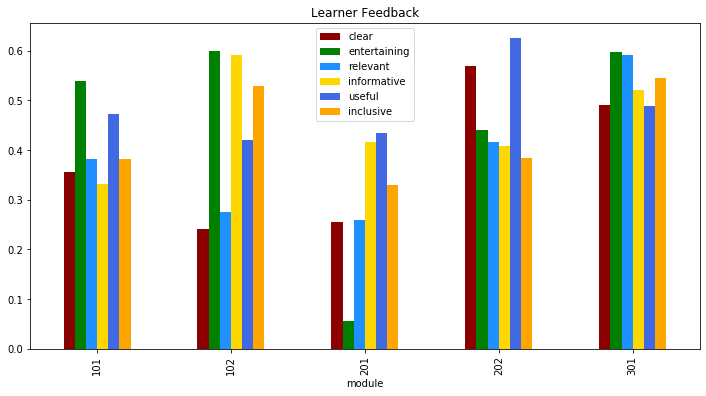

In [16]:
module.groupby("module").agg('mean').plot(title="Learner Feedback", kind="bar", figsize=(12,6),
                                       color=seven_diff)

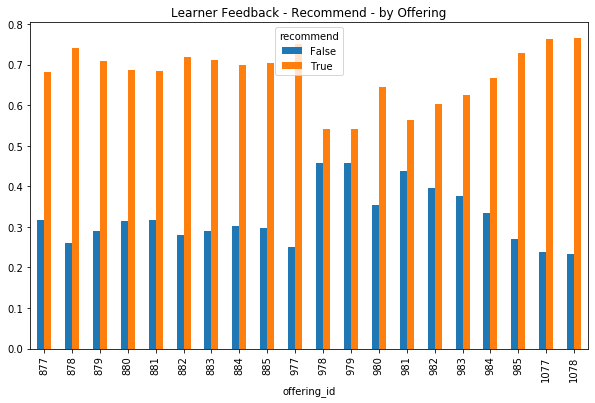

In [41]:
pd.crosstab(df.offering_id, df.recommend, normalize="index").plot(
    title="Learner Feedback - Recommend - by Offering", kind="bar", figsize=(10,6))

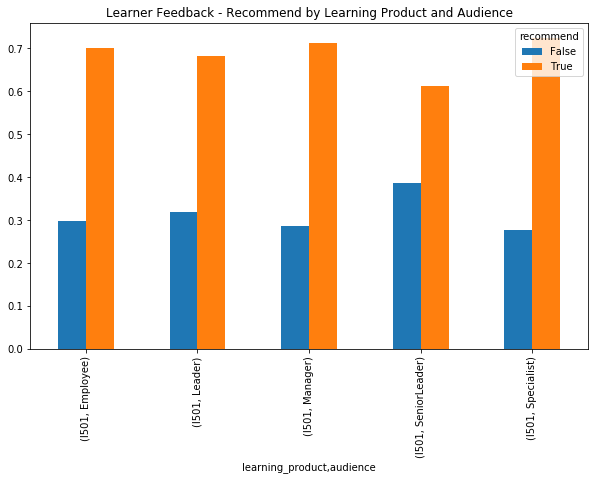

In [47]:
pd.crosstab([df.learning_product.where(df.learning_product=="I501"), df.audience], df.recommend, normalize="index").plot(
    title="Learner Feedback - Recommend by Learning Product and Audience", kind="bar", figsize=(10,6))

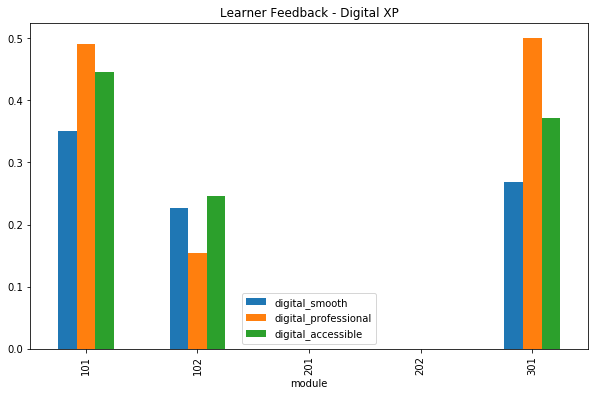

In [19]:
digital.groupby("module").agg('mean').plot(title="Learner Feedback - Digital XP", kind="bar", figsize=(10,6))

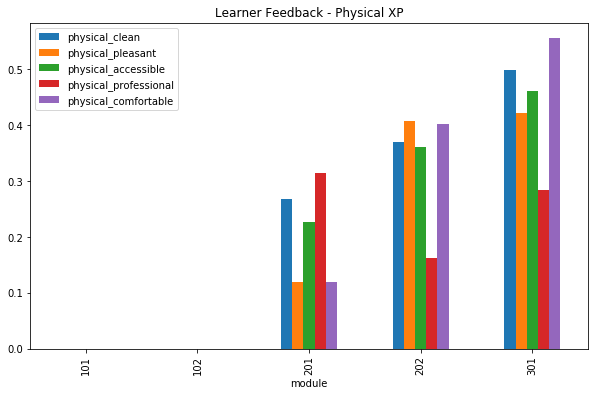

In [20]:
physical.groupby("module").agg('mean').plot(title="Learner Feedback - Physical XP", kind="bar", figsize=(10,6))

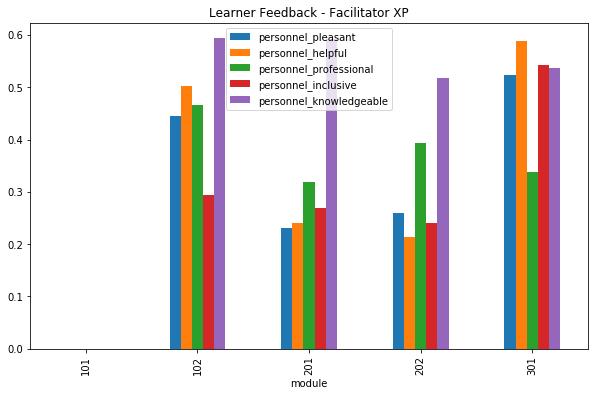

In [21]:
personnel.groupby("module").agg('mean').plot(title="Learner Feedback - Facilitator XP", kind="bar", figsize=(10,6))

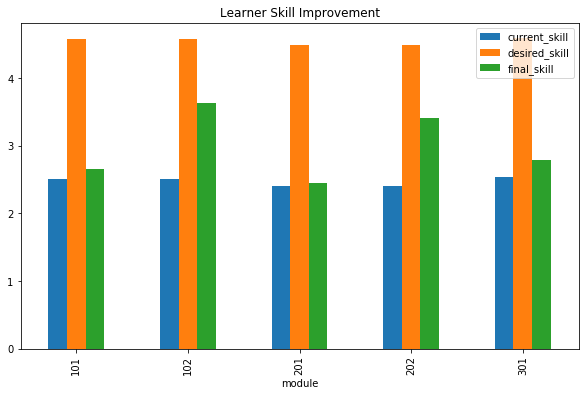

In [22]:
skill.groupby("module").agg('mean').plot(title="Learner Skill Improvement", kind="bar", figsize=(10,6))

In [23]:
learning_obj.lo_1.unique()

array(['NotMeet', 'Meet', 'Exceeded'], dtype=object)

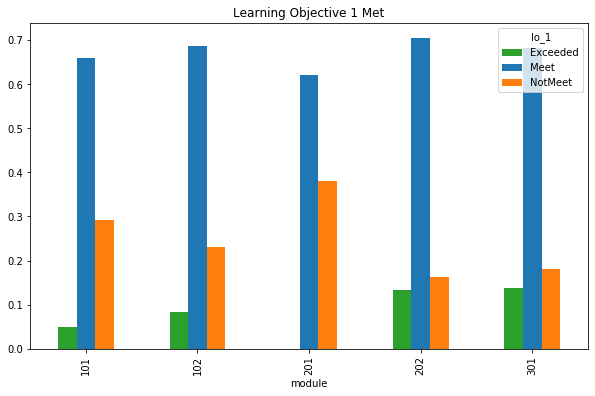

In [24]:
pd.crosstab(learning_obj.module, learning_obj.lo_1, normalize='index').plot(kind='bar', color=['C2', 'C0', 'C1'], title="Learning Objective 1 Met", figsize=(10,6))

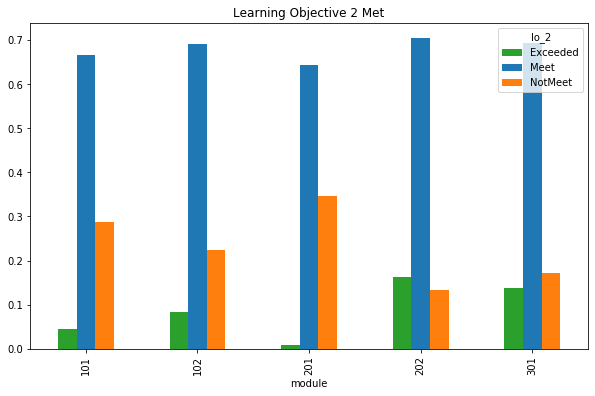

In [25]:
pd.crosstab(learning_obj.module, learning_obj.lo_2, normalize='index').plot(kind='bar', color=['C2', 'C0', 'C1'], title="Learning Objective 2 Met", figsize=(10,6))

In [26]:
learning_obj.columns

Index(['module', 'lo_1', 'lo_2'], dtype='object')

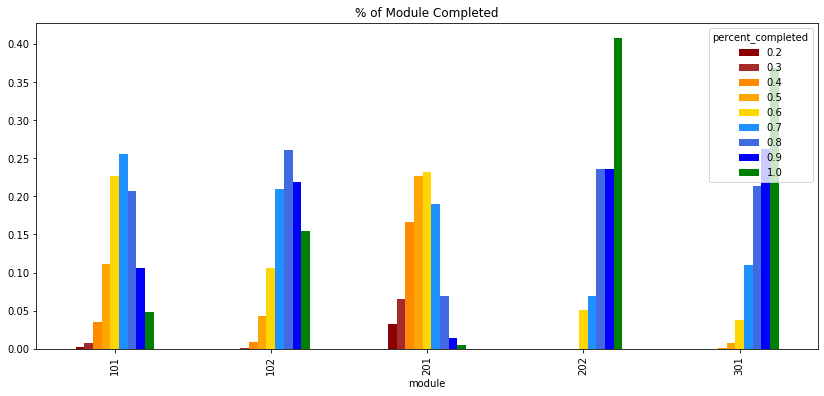

In [27]:
pd.crosstab(scan.module, scan.percent_completed, normalize='index').plot(kind='bar', title="% of Module Completed", figsize=(14,6), color=eleven_grad)

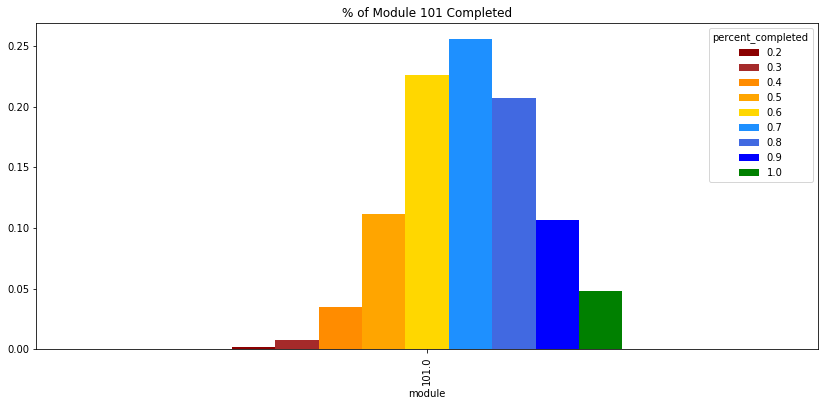

In [28]:
pd.crosstab(scan.module.where(scan.module==101), scan.percent_completed, normalize='index').plot(kind='bar', title="% of Module 101 Completed", figsize=(14,6), color=eleven_grad)

In [29]:
pd.crosstab([df.offering_id, df.learning_product.where(df.learning_product=="I501")], df.rating)

,rating,4,5,6,7,8,9,10
offering_id,learning_product,,,,,,,
877,I501,32,111,175,218,167,113,184
878,I501,13,81,165,190,191,144,216
879,I501,19,112,159,201,160,136,213
880,I501,33,106,175,219,153,138,176
881,I501,21,93,202,212,172,127,173
882,I501,22,87,172,224,186,126,183
883,I501,26,93,170,249,172,134,156
884,I501,32,90,179,200,185,134,180
885,I501,28,85,183,235,157,134,178


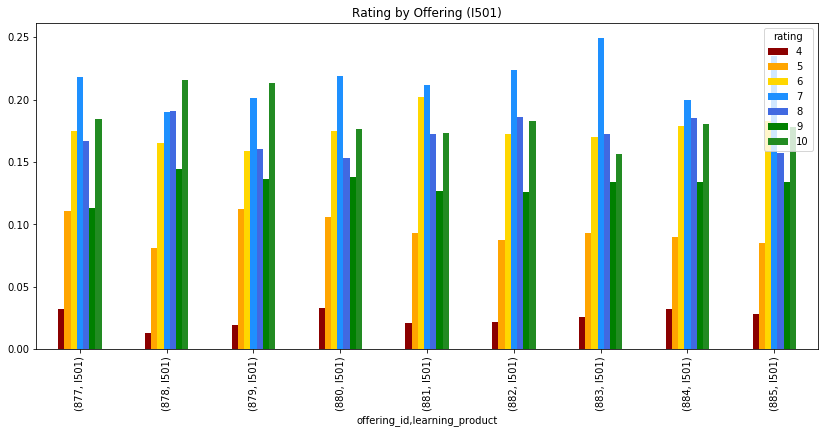

In [30]:
pd.crosstab([df.offering_id, df.learning_product.where(df.learning_product=="I501")], df.rating, normalize='index').plot(kind='bar', title="Rating by Offering (I501)", figsize=(14,6),
                                                                                                                        color=seven_grad)

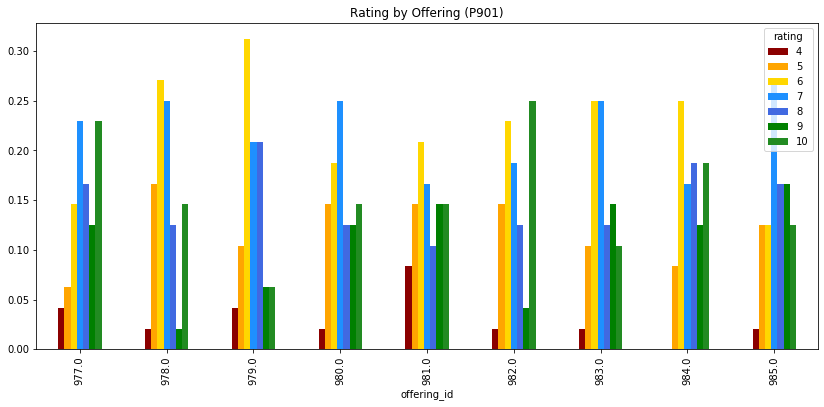

In [31]:
pd.crosstab(df.offering_id.where(df.learning_product=="P901"), df.rating, normalize="index").plot(
    kind='bar', title="Rating by Offering (P901)", figsize=(14,6), color=seven_grad)

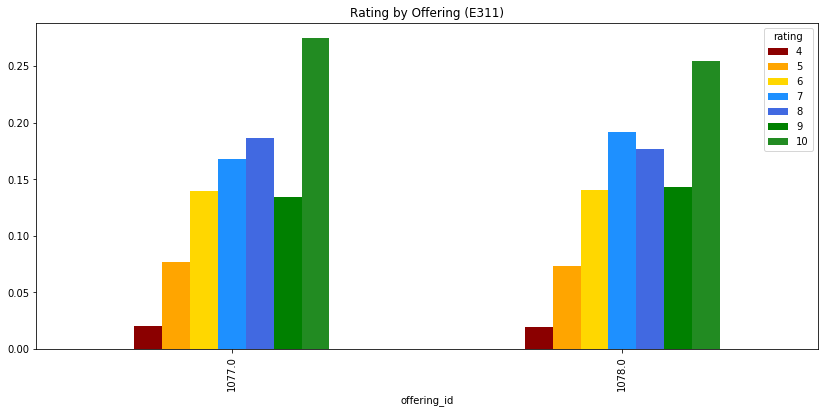

In [32]:
df.groupby(df["offering_id"].where(df.learning_product=="E311"))["rating"].value_counts(
    normalize=True).unstack().plot(kind='bar', title="Rating by Offering (E311)", figsize=(14,6),
                                                                                                                      color=seven_grad)

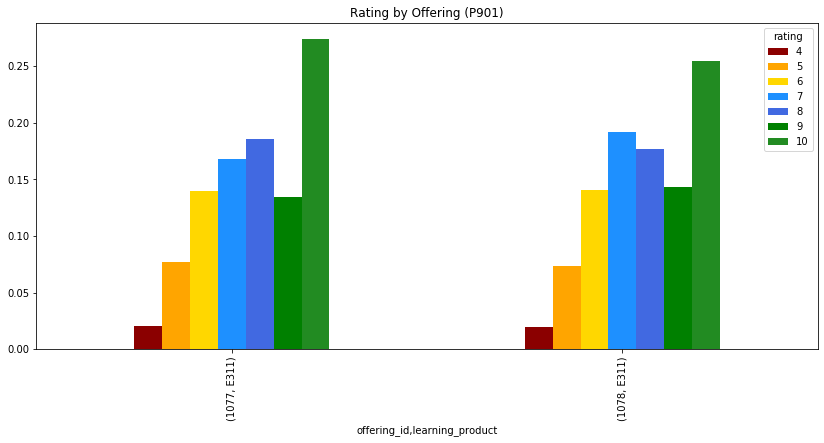

In [33]:
pd.crosstab([df.offering_id, df.learning_product.where(df.learning_product=="E311")], df.rating, normalize="index").plot(kind='bar', title="Rating by Offering (P901)", figsize=(14,6),
                                                                                                                      color=seven_grad)

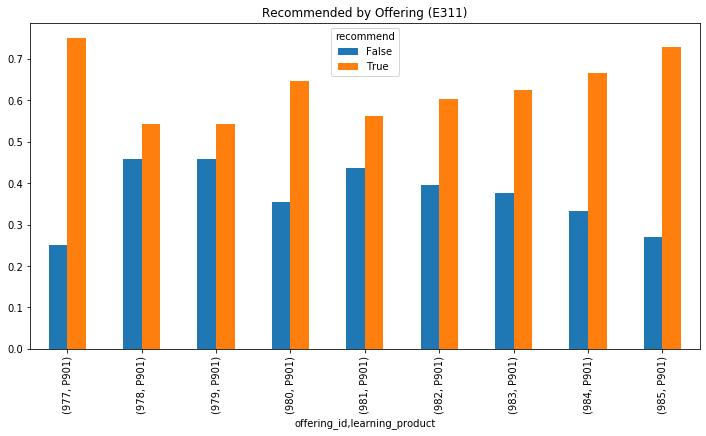

In [34]:
pd.crosstab([df.offering_id, df.learning_product.where(df.learning_product=="P901")], df.recommend, normalize="index").plot(kind='bar', title="Recommended by Offering (E311)", figsize=(12,6))

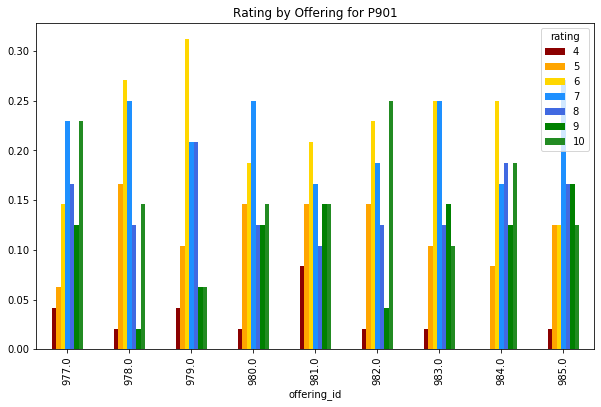

In [35]:
pd.crosstab(df.offering_id.where(df.learning_product=="P901"), df.rating, normalize="index").plot(
    kind='bar', title="Rating by Offering for P901", figsize=(10,6), color=seven_grad)

In [36]:
rating_offering.groupby("learning_product").agg("mean")

,rating
learning_product,
E311,7.901500
I501,7.546444
P901,7.275463


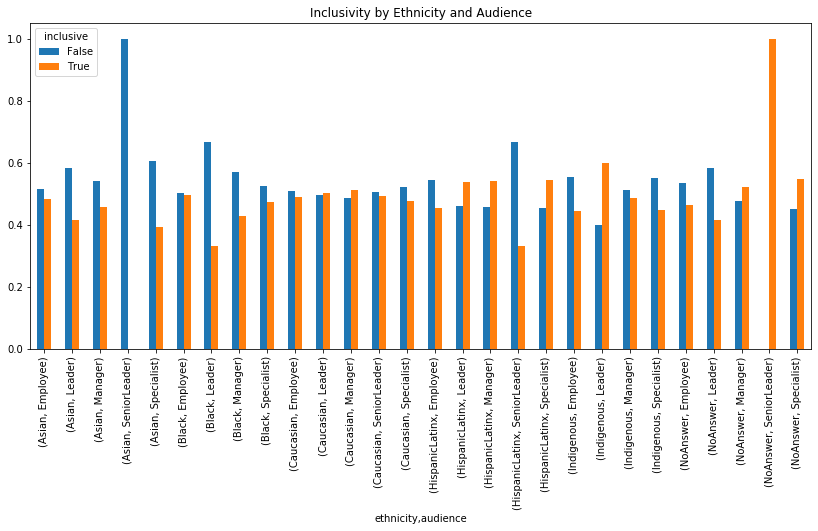

In [37]:
pd.crosstab([df.ethnicity, df.audience], df.inclusive, normalize="index").plot(kind='bar', title="Inclusivity by Ethnicity and Audience", figsize=(14,6))

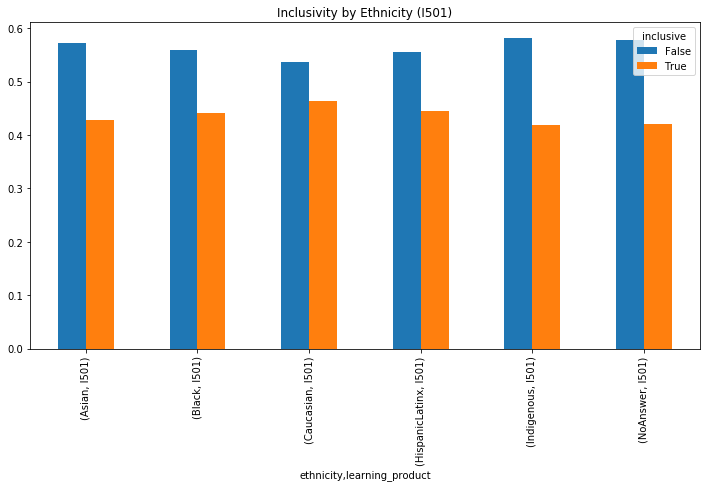

In [38]:
pd.crosstab([df.ethnicity, df.learning_product.where(df.learning_product=="I501")], df.inclusive==True, normalize="index").plot(kind='bar', title="Inclusivity by Ethnicity (I501)", figsize=(12,6))

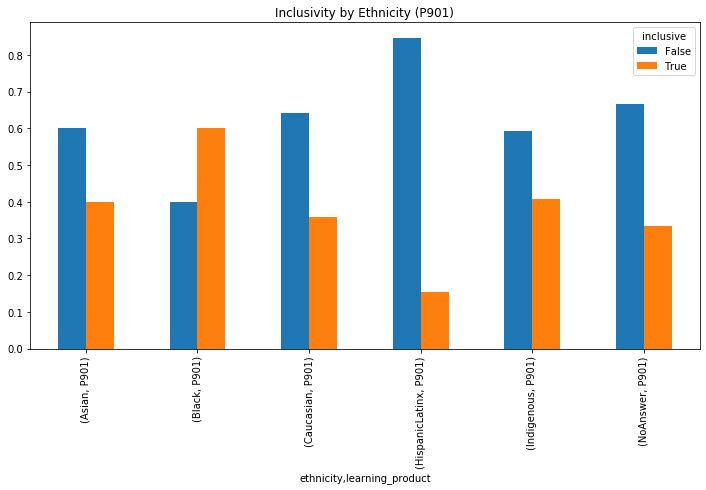

In [39]:
pd.crosstab([df.ethnicity, df.learning_product.where(df.learning_product=="P901")], df.inclusive==True, normalize="index").plot(kind='bar', title="Inclusivity by Ethnicity (P901)", figsize=(12,6))

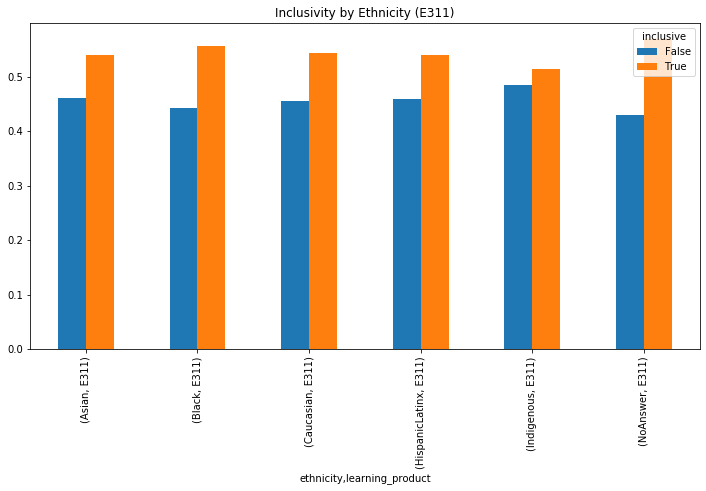

In [40]:
pd.crosstab([df.ethnicity, df.learning_product.where(df.learning_product=="E311")], df.inclusive==True, normalize="index").plot(kind='bar', title="Inclusivity by Ethnicity (E311)", figsize=(12,6))